## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 5 is due on 3/17/25

Write a function spec'd as follows:

In [1]:
import numpy as np

def norm_vec(x):
    """Compute the Euclidean norm of a vector."""
    return np.sqrt(np.sum(x**2))

def orthogonal_projection(a, v):
    """
    Projects vector a onto vector v.
    
    Parameters:
        a (numpy.ndarray): The vector to project.
        v (numpy.ndarray): The vector to project onto.
    
    Returns:
        dict: A dictionary with keys:
            'a_parallel': the projection of a onto v,
            'a_perpendicular': the residual component of a orthogonal to v.
    """
    # Ensure that a and v are numpy arrays
    a = np.asarray(a)
    v = np.asarray(v)
    
    # Compute the squared norm of v
    v_norm_sq = norm_vec(v)**2
    
    # Create the projection matrix using the outer product of v
    H = np.outer(v, v) / v_norm_sq
    
    # Compute the parallel component of a
    a_parallel = H @ a
    
    # Compute the orthogonal (perpendicular) component
    a_perpendicular = a - a_parallel
    
    return {'a_parallel': a_parallel, 'a_perpendicular': a_perpendicular}


Provide predictions for each of these computations and then run them to make sure you're correct.

In [3]:
# Test 1:
print("Test 1: orthogonal_projection([1,2,3,4], [1,2,3,4])")
result1 = orthogonal_projection([1,2,3,4], [1,2,3,4])
print("a_parallel:")
print(result1['a_parallel'])        # Expected: [1, 2, 3, 4]
print("a_perpendicular:")
print(result1['a_perpendicular'])     # Expected: [0, 0, 0, 0]

# Test 2:
print("\nTest 2: orthogonal_projection([1,2,3,4], [0,2,0,-1])")
result2 = orthogonal_projection([1,2,3,4], [0,2,0,-1])
print("a_parallel:")
print(result2['a_parallel'])          # Expected: [0, 0, 0, 0]
print("a_perpendicular:")
print(result2['a_perpendicular'])       # Expected: [1, 2, 3, 4]

# Test 3:
print("\nTest 3: result = orthogonal_projection([2,6,7,3], [1,3,5,7]*37)")
# Multiply [1,3,5,7] by 37 and project
v3 = np.array([1,3,5,7]) * 37
result3 = orthogonal_projection([2,6,7,3], v3)

# Compute dot product between a_parallel and a_perpendicular (should be near 0)
dot_product = np.dot(result3['a_parallel'], result3['a_perpendicular'])
print("Dot product (should be near 0):", dot_product)

# Sum of parallel and perpendicular components should return the original vector.
sum_vector = result3['a_parallel'] + result3['a_perpendicular']
print("Sum (should equal original vector [2,6,7,3]):")
print(sum_vector)

# Compute the "percentage" of the projection relative to v3.
percentage = result3['a_parallel'] / v3
print("a_parallel divided by ([1,3,5,7]*37) (percentage of projection):")
print(percentage)


Test 1: orthogonal_projection([1,2,3,4], [1,2,3,4])
a_parallel:
[1. 2. 3. 4.]
a_perpendicular:
[0. 0. 0. 0.]

Test 2: orthogonal_projection([1,2,3,4], [0,2,0,-1])
a_parallel:
[0. 0. 0. 0.]
a_perpendicular:
[1. 2. 3. 4.]

Test 3: result = orthogonal_projection([2,6,7,3], [1,3,5,7]*37)
Dot product (should be near 0): -5.329070518200751e-15
Sum (should equal original vector [2,6,7,3]):
[2. 6. 7. 3.]
a_parallel divided by ([1,3,5,7]*37) (percentage of projection):
[0.02445302 0.02445302 0.02445302 0.02445302]


Create a vector y by simulating n = 100 standard iid normals. Create a matrix of size 100 x 2 and populate the first column by all ones (for the intercept) and the second column by 100 standard iid normals. Find the R^2 of an OLS regression of `y ~ X`. Use matrix algebra.

In [5]:
import numpy as np

# Set seed for reproducibility
np.random.seed(123)

# Simulate data
n = 100
y = np.random.randn(n, 1)  # y as a column vector (100 x 1)
X = np.hstack((np.ones((n, 1)), np.random.randn(n, 1)))  # X as 100 x 2 matrix

# Compute OLS coefficients: beta_hat = (X'X)^{-1} X'y
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Compute the hat matrix H = X (X'X)^{-1} X'
H = X @ np.linalg.inv(X.T @ X) @ X.T

# Identity matrix of size n
I = np.eye(n)

# Compute SSR (Residual Sum of Squares) using matrix algebra: SSR = y' (I - H) y
SSR = (y.T @ (I - H) @ y).item() #.item() will grab the value out of the array 

# Define the centering matrix: M = I - (1/n) * 11'
M = I - (1/n) * np.ones((n, n))

# Compute SST (Total Sum of Squares) using matrix algebra: SST = y' M y
SST = (y.T @ M @ y).item() 

# Calculate R-squared
R2 = 1 - SSR / SST

# Print the results
print("SSR:", SSR)
print("SST:", SST)
print("R^2:", R2)

SSR: 127.24524905012579
SST: 127.2926559224331
R^2: 0.0003724242531022437


Write a for loop to each time bind a new column of 100 standard iid normals to the matrix X and find the R^2 each time until the number of columns is 100. Create a vector to save all R^2's. What happened??

In [7]:
import numpy as np

# Set seed for reproducibility
np.random.seed(123)

# Simulate data
n = 100
y = np.random.randn(n)  # response vector (100,)

# Start with an intercept-only matrix X (100 x 1)
X = np.ones((n, 1))

# Pre-allocate a list to save R^2 values (one for each model size)
R2_list = []

# Loop until the number of columns in X is 100
# First iteration: intercept only; then add one new column per iteration.
for i in range(100):
    # For iterations after the first, bind a new column of iid normals.
    if i > 0:
        new_column = np.random.randn(n, 1)
        X = np.hstack((X, new_column))
    
    # Compute OLS coefficients using the normal equation: beta_hat = (X'X)^{-1} X'y
    beta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)
    
    # Compute fitted values
    y_hat = X @ beta_hat
    
    # Compute Total Sum of Squares (SST) and Residual Sum of Squares (SSR)
    SST = np.sum((y - np.mean(y))**2)
    SSR = np.sum((y - y_hat)**2)
    
    # Calculate R-squared and store it
    R2 = 1 - SSR / SST
    R2_list.append(R2)

# Print the vector of R^2 values
print("R^2 values for models with 1 to 100 columns:")
print(R2_list)

R^2 values for models with 1 to 100 columns:
[0.0, 0.00037242425310191063, 0.0039534712234703395, 0.015515917195883744, 0.0160129569554901, 0.060483757420479844, 0.0604856345047039, 0.06791713923101828, 0.11552054867820061, 0.11598543147994111, 0.16253199145134212, 0.16324852246361643, 0.1653058735950539, 0.16726405487373375, 0.16959752126125305, 0.1867916546549011, 0.18680390934298907, 0.19280704730131815, 0.19656454956494718, 0.20676806135980885, 0.2067805910051016, 0.21297298468610126, 0.21413227261249568, 0.22344231007274185, 0.2644021621922207, 0.2688518991099367, 0.290450808990139, 0.29132140616382174, 0.2940661523691508, 0.29505341769528637, 0.3224612676383529, 0.34069205476632747, 0.34966372664455914, 0.36519299490256085, 0.36609673260436104, 0.38741665786176294, 0.4030608157085439, 0.40637996512050323, 0.4084185281712275, 0.4086532629450572, 0.4087302243058517, 0.4122560226143147, 0.4199723297044975, 0.45296272233899937, 0.45435748259751674, 0.4583895135974029, 0.4584411626637

What happened? As more predictors are added, even if they are just noise, the R2 generally increases, relfecting that the model is overfitting the data.

We are adding more linearly independant cols, so the dimention we are projecting on is increading, and Rsq is increasing in tandome. One the rank[x] = nrow[x] we are projecting y into its own saapce, so Rsq is 1.

Test that the projection matrix onto this X is the same as I_n.

In [9]:
# Compute the projection matrix: P = X (X'X)^{-1} X'
P = X @ np.linalg.inv(X.T @ X) @ X.T

# Define the 100 x 100 identity matrix
I_n = np.eye(n)

# Test that the projection matrix P equals the identity matrix.
if np.allclose(P, I_n, rtol = 1e-10):
    print("Projection matrix P equals the identity matrix I_n.")
else:
    print("Projection matrix P does NOT equal the identity matrix I_n.")

# Alternatively, use an assertion to ensure they are equal
assert np.allclose(P, I_n, rtol = 1e-10), "Projection matrix does not equal identity matrix!"

Projection matrix P equals the identity matrix I_n.


Add one final column to X to bring the number of columns to 101. Then try to compute R^2. What happens? 

In [11]:
# Now add one final column to bring the number of columns to 101.
extra_col = np.random.randn(n, 1)
X_new = np.hstack((X, extra_col))  # X_new is 100 x 101

# Try to compute OLS coefficients; catch the error if X.T @ X is singular.
try:
    beta_hat = np.linalg.inv(X_new.T @ X_new) @ (X_new.T @ y)
    y_hat = X_new @ beta_hat
    SST = np.sum((y - np.mean(y))**2)
    SSR = np.sum((y - y_hat)**2)
    R2 = 1 - SSR / SST
    print("R^2:", R2)
except np.linalg.LinAlgError as e:
    print("Error in computing beta_hat:", e)
    print("Could not compute R^2 because X'X is singular.")

R^2: 0.329982598006896


Why does this make sense?

linearly dependant col

Let's use the Boston Housing Data for the following exercises

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the Boston housing data from the provided URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# The dataset from this URL is arranged so that every two rows correspond to one observation:
# - The first row of each pair contains the 13 predictors.
# - The second row contains (among other entries) the response (medv) in the third column.
# Also, the first two columns of the second row are duplicates of the last two predictors.
#
# To mimic R’s model.matrix(medv ~ ., MASS::Boston), we construct the predictors by:
# 1. Taking all 13 predictors from the first row of each pair.
# 2. Appending the first two entries from the second row (which complete the predictors).
#
# This creates a full set of predictors for each observation.
X_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# The response y is stored in the third column of the second row of each pair.
y = raw_df.values[1::2, 2]

# Add an intercept column (like R's model.matrix does automatically)
X = sm.add_constant(X_data)

# p_plus_one is the number of columns in X (predictors plus intercept)
p_plus_one = X.shape[1]
# n is the number of observations (rows in X)
n = X.shape[0]

print("Number of predictors (including intercept):", p_plus_one)
print("Number of observations:", n)


Number of predictors (including intercept): 14
Number of observations: 506


Using your function `orthogonal_projection` orthogonally project onto the column space of X by projecting y on each vector of X individually and adding up the projections and call the sum `yhat_naive`.

In [15]:
# Initialize yhat_naive as a zero vector (same shape as y)
yhat_naive = np.zeros_like(y, dtype = float)

# For each column in X, project y onto that column and add the projection.
for j in range(p_plus_one):
    # Note: X[:, j] is a 1D array of length n.
    proj = orthogonal_projection(y, X[:, j])
    yhat_naive += proj['a_parallel']

How much double counting occurred? Measure the magnitude relative to the true LS orthogonal projection

In [17]:
import statsmodels.api as sm

# Fit the OLS model using statsmodels
model = sm.OLS(y, X).fit()

# Extract the fitted values (equivalent to lm(medv ~ ., MASS::Boston)$fitted.values in R)
yhat = model.fittedvalues
mag_ratio = np.sqrt(np.sum(yhat_naive**2)) / np.sqrt(np.sum(yhat**2))
print("Magnitude ratio (sqrt(sum(yhat_naive^2))/sqrt(sum(yhat^2))):", mag_ratio)

Magnitude ratio (sqrt(sum(yhat_naive^2))/sqrt(sum(yhat^2))): 8.997117717661743


Is this ratio expected? Why or why not?

It is expected becasue the cols of X are not orthognial. 

In summary, the ratio is expected to deviate from 1 because the sum of individual (non-orthogonal) projections overestimates the overall projection onto the column space, leading to a larger magnitude for the naive projection compared to the true LS projection.

Convert X into V where V has the same column space as X but has orthogonal columns. You can use the function `orthogonal_projection`. This is the Gram-Schmidt orthogonalization algorithm (part A).

In [19]:
# Initialize V to hold the orthogonalized columns; same shape as X.
V = np.empty_like(X)

# The first column of V is just the first column of X.
V[:, 0] = X[:, 0]

# For each subsequent column of X, subtract the projections onto all previous V columns.
for j in range(1, X.shape[1]):
    # Start with the original column from X.
    V[:, j] = X[:, j].copy()
    for k in range(j):
        proj = orthogonal_projection(X[:, j], V[:, k])['a_parallel']
        V[:, j] = V[:, j] - proj


Convert V into Q whose columns are the same except normalized. This is the Gram-Schmidt orthogonalization algorithm (part B).

In [21]:
# Assume V is already defined with shape (n, p_plus_one)
Q = np.empty_like(V)
for j in range(V.shape[1]):
    Q[:, j] = V[:, j] / np.sqrt(np.sum(V[:, j]**2))

# Optionally, remove V if you no longer need it.
del V

Verify Q^T Q is I_{p+1} i.e. Q is an orthonormal matrix.

In [25]:
# Verify that Q^T Q is the identity matrix of size p_plus_one
p_plus_one = Q.shape[1]

assert np.allclose(Q.T @ Q, np.eye(p_plus_one), rtol = 1e-7)

print("Q^T Q equals the identity matrix, Q is orthonormal.")

Q^T Q equals the identity matrix, Q is orthonormal.


Is your Q the same as what results from R's built-in QR-decomposition function?

In [27]:
# Compute the Q matrix using NumPy's QR decomposition.
# np.linalg.qr returns (Q, R)
Q_from_builtin, x = np.linalg.qr(X)

# Because QR decomposition can produce Q whose columns differ by a sign,
# we compare the absolute values of Q and Q_from_builtin.
if np.allclose(np.abs(Q_from_builtin), np.abs(Q)) :
    print("Q matches the built-in QR decomposition Q (up to sign differences).")
else:
    print("Q does not match the built-in QR decomposition Q.")

Q matches the built-in QR decomposition Q (up to sign differences).


In [29]:
if np.allclose(Q_from_builtin, Q) :
    print("Q matches the built-in QR decomposition Q (up to sign differences).")
else:
    print("Q does not match the built-in QR decomposition Q.")

Q does not match the built-in QR decomposition Q.


Is this expected? Why did this happen?

There are multiple orthono-normal matrices that have the same col space as X. The one we found hapens to be diferent than the one the algorithm found.

Yes this is expected because there are an infinite number of orthonormal basis of any column space and the likelihood of them being equal is highly unlikely.  
There are many different orthonormal basis of any column space. 

Project y onto colsp[Q] and verify it is the same as the OLS fit.

In [31]:
# Assume y, X, and Q are already defined.
# Compute the OLS fitted values using statsmodels (similar to lm(y ~ X) in R)
model = sm.OLS(y, X).fit()
y_hat = model.fittedvalues
# Project y onto the column space of Q: compute Q @ Q.T @ y
y_hat_from_Q = Q @ Q.T @ y

# Compare the two. Since the values may have slight numerical differences, use np.allclose.
if np.allclose(y_hat, y_hat_from_Q):
    print("The projection of y onto colsp[Q] equals the OLS fit.")
else:
    print("There is a discrepancy between the projection and the OLS fit.")

# Optionally, you can print the difference:
print("Difference:", y_hat - y_hat_from_Q)

The projection of y onto colsp[Q] equals the OLS fit.
Difference: [-6.03961325e-14  9.59232693e-14 -2.48689958e-14  6.75015599e-14
  2.13162821e-14  1.84741111e-13  7.10542736e-14  4.97379915e-14
  5.32907052e-14  9.59232693e-14 -3.55271368e-15  1.10134124e-13
 -1.06581410e-14  1.56319402e-13  1.77635684e-13  1.66977543e-13
  1.06581410e-13  1.31450406e-13  1.59872116e-13  1.77635684e-13
  1.81188398e-13  1.56319402e-13  7.46069873e-14  1.50990331e-13
  1.65201186e-13  2.07833750e-13  1.86517468e-13  1.27897692e-13
  9.23705556e-14  3.19744231e-14  1.42108547e-13  1.84741111e-13
  1.95399252e-14  1.75859327e-13  1.08357767e-13  1.74082970e-13
  1.66977543e-13  1.49213975e-13  7.10542736e-14  1.13686838e-13
  4.97379915e-14 -5.68434189e-14  6.03961325e-14  2.48689958e-14
  1.27897692e-13  1.59872116e-13  9.23705556e-14  1.38555833e-13
  1.61648472e-13  2.06057393e-13  1.52766688e-13  2.23820962e-13
  7.46069873e-14  1.38555833e-13 -2.07833750e-13  1.66977543e-13
  5.68434189e-14  2.0605

Project y onto colsp[Q] one by one and verify it sums to be the projection onto the whole space.

In [33]:
# Compute the naive projection: project y onto each column of Q and sum.
yhat_naive = np.zeros_like(y)

for j in range(p_plus_one):
    proj = orthogonal_projection(y, Q[:, j])['a_parallel']
    yhat_naive = yhat_naive + proj
              
# Compute the full projection using the projection matrix H.
# Since Q is orthonormal, Q.T @ Q equals the identity matrix.
H = Q @ Q.T  # Equivalent to Q @ np.linalg.inv(Q.T @ Q) @ Q.T

# Verify that H @ y is the same as yhat_naive.
if np.allclose(yhat_naive, H @ y):
    print("The naive projection equals the full projection.")
else:
    print("There is a discrepancy between the projections.")

# Optionally, to mimic R's expect_equal with unname:
print("Difference:", yhat_naive - H @ y)

The naive projection equals the full projection.
Difference: [1.06581410e-14 1.42108547e-14 2.13162821e-14 1.42108547e-14
 1.42108547e-14 1.06581410e-14 2.48689958e-14 2.13162821e-14
 1.59872116e-14 1.77635684e-14 1.42108547e-14 1.06581410e-14
 2.48689958e-14 1.77635684e-14 1.77635684e-14 2.13162821e-14
 1.77635684e-14 1.77635684e-14 1.42108547e-14 1.77635684e-14
 2.30926389e-14 1.06581410e-14 1.06581410e-14 1.06581410e-14
 8.88178420e-15 1.42108547e-14 7.10542736e-15 1.95399252e-14
 1.77635684e-14 0.00000000e+00 1.42108547e-14 1.77635684e-14
 1.59872116e-14 1.59872116e-14 1.95399252e-14 1.06581410e-14
 1.06581410e-14 1.42108547e-14 1.42108547e-14 1.06581410e-14
 2.84217094e-14 1.42108547e-14 2.13162821e-14 7.10542736e-15
 1.77635684e-14 3.55271368e-15 1.06581410e-14 1.42108547e-14
 5.32907052e-15 2.48689958e-14 1.06581410e-14 1.42108547e-14
 1.77635684e-14 1.42108547e-14 1.77635684e-14 1.77635684e-14
 1.77635684e-14 1.42108547e-14 2.48689958e-14 1.77635684e-14
 2.13162821e-14 1.776356

Split the Boston Housing Data into a training set and a test set where the training set is 80% of the observations. Do so at random.

In [35]:
# Assume n, X, and y are already defined. For example:
# n = X.shape[0]
# (Make sure X is a NumPy array and y is a 1D array or similar.)
k = 5
n_test = round(n * 1 / k)
n_train = n - n_test

#Create an array of all indices (0 indexed in python)
all_indices = np.arange(n)
#randomly ample n_test indices for the test ser (without replacement)
test_indices = np.random.choice(all_indices, size = n_test, replace = False)
#train indices are wheat is not in the test indices
train_indices = np.setdiff1d(all_indices, test_indices)

X_train = X[train_indices, :]
y_train = y[train_indices]
X_test = X[test_indices, :]
y_test = y[test_indices]


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train length:", len(y_train))
print("y_test length:", len(y_test))


X_train shape: (405, 14)
X_test shape: (101, 14)
y_train length: 405
y_test length: 101


Fit an OLS model. Find the s_e in sample and out of sample. Which one is greater? Note: we are now using s_e and not RMSE since RMSE has the n-(p + 1) in the denominator not n-1 which attempts to de-bias the error estimate by inflating the estimate when overfitting in high p. Again, we're just using `sd(e)`, the sample standard deviation of the residuals.

In [37]:
# Fit the OLS model on the training set.
# (Assume X_train and y_train have already been defined,
# and that X_train already includes a constant column if needed.)
model = sm.OLS(y_train, X_train).fit()

# in sample standard error
in_sample_se = np.std(model.resid, ddof = 1)
# out of sample predictions and residuals
y_pred_test = model.predict(X_test)
out_sample_resid = y_test - y_pred_test
out_sample_se = np.std(out_sample_resid, ddof = 1)

print("In-sample s_e (sample SD of residuals):", in_sample_se)
print("Out-of-sample s_e (sample SD of residuals):", out_sample_se)

# Typically, the out-of-sample s_e will be greater than the in-sample s_e.

In-sample s_e (sample SD of residuals): 4.75573414563032
Out-of-sample s_e (sample SD of residuals): 4.534163064894879


Do these two exercises `Nsim = 1000` times and find the average difference between s_e and ooss_e.

In [39]:
# Assume n, X, and y are already defined.
# Here, n is the total number of observations.
# X is the design matrix and y is the response vector.
# For consistency with the R code (which uses '+0'), we will fit the model without a constant.
# If X already has a constant column, you might need to remove it; here we assume X does NOT include one.
k = 5
n_test = round(n * 1 / k)
n_train = n - n_test
Nsim = 1000

oosSSE_array = np.empty(Nsim)
s_e_array = np.empty(Nsim)

for i in range(Nsim):
    all_indices = np.arange(n)
    test_indices = np.random.choice(all_indices, size = n_test, replace = False)
    train_indices = np.setdiff1d(all_indices, test_indices)

    X_train = X[train_indices, :]
    y_train = y[train_indices]
    X_test = X[test_indices, :]
    y_test = y[test_indices]

    model = sm.OLS(y_train, X_train).fit()
    # Predict on the test set
    y_hat_test = model.predict(X_test)
    
    # Compute out-of-sample standard error (sample standard deviation of test residuals)
    oosSSE_array[i] = np.std(y_test - y_hat_test, ddof = 1)
    # Compute in-sample standard error (sample standard deviation of residuals from the training fit)
    s_e_array[i] = np.std(model.resid, ddof = 1)

# Compute the average difference between in-sample and out-of-sample s_e
mean_diff = np.mean(s_e_array - oosSSE_array)
print("Average difference (s_e - ooss_e):", mean_diff)


Average difference (s_e - ooss_e): -0.21774141991249799


We'll now add random junk to the data so that `p_plus_one = n_train` and create a new data matrix `X_with_junk.`

In [41]:
# Assume X, n, n_train, and p_plus_one are already defined.
# Create the junk matrix: with n rows and (n_train - p_plus_one) columns.
junk = np.random.randn(n, n_train - p_plus_one)

# Concatenate X and the junk matrix horizontally
X_with_junk = np.hstack((X, junk))

# Print dimensions
print("X shape:", X.shape)
print("X_with_junk shape:", X_with_junk.shape)

X shape: (506, 14)
X_with_junk shape: (506, 405)


Repeat the exercise above measuring the average s_e and ooss_e but this time record these metrics by number of features used. That is, do it for the first column of `X_with_junk` (the intercept column), then do it for the first and second columns, then the first three columns, etc until you do it for all columns of `X_with_junk`. Save these in `s_e_by_p` and `ooss_e_by_p`.

In [43]:
K = 5  # Test set is 1/5 of the data
n_test = round(n * 1 / k)
n_train = n - n_test
Nsim = 10

num_features = X_with_junk.shape[1]
ooss_e_by_p = np.empty(num_features)
s_e_by_p = np.empty(num_features)

# Loop over model sizes (using the first j columns of X_with_junk)
for j in range(1, num_features + 1):
    oosSSE_array = np.empty(Nsim)
    s_e_array = np.empty(Nsim)
    
    for i in range(Nsim):
        # Generate random test indices without replacement (0-indexed)
        all_indices = np.arange(n)
        test_indices = np.random.choice(all_indices, size = n_test, replace = False)
        train_indices = np.setdiff1d(all_indices, test_indices)
        
        # Subset the data using the first j columns
        X_train = X_with_junk[train_indices, :j]
        y_train = y[train_indices]
        X_test = X_with_junk[test_indices, :j]
        y_test = y[test_indices]
        
        # Fit an OLS model with no intercept (like lm(... + 0) in R)
        model = sm.OLS(y_train, X_train).fit()
        
        # Predict on the test set
        y_hat_test = model.predict(X_test)
        
        # Compute the sample standard deviation (ddof=1) of residuals
        oosSSE_array[i] = np.std(y_test - y_hat_test, ddof=1)
        s_e_array[i] = np.std(model.resid, ddof=1)
    
    # Record the average errors for model size j
    ooss_e_by_p[j-1] = np.mean(oosSSE_array)
    s_e_by_p[j-1] = np.mean(s_e_array)

print("Average out-of-sample s_e by number of features:")
print(ooss_e_by_p)
print("Average in-sample s_e by number of features:")
print(s_e_by_p)

Average out-of-sample s_e by number of features:
[  9.30368717   8.41068739   8.19576393   8.1322536    7.3495703
   7.57064828   6.0492417    6.04580818   5.68821112   5.58478548
   5.53437121   5.65670261   5.19819067   4.90976751   5.02887989
   4.95685517   4.79495585   5.00582816   4.99343681   4.71621479
   4.88751389   5.15694699   4.80008918   4.72708536   4.94070399
   4.8819765    4.75205187   4.87502364   4.82689987   4.87284506
   4.92219484   5.03175082   5.20002699   4.87667297   4.96170918
   4.90622311   4.9719373    5.1661185    5.06183512   5.05775726
   5.03037845   5.40661783   5.1397493    5.47506476   4.99781388
   5.23892649   5.02945712   4.99866276   5.17653893   5.06849331
   5.23732273   5.3869959    5.28269291   4.7875097    5.23745131
   5.28571399   5.10176321   4.88893068   5.31576886   5.0108902
   4.97643876   4.92402718   5.27122373   4.85767424   4.93774587
   5.01792397   5.52271023   5.0731092    4.89835278   4.99333347
   5.28553078   5.07992021   

You can graph them here:

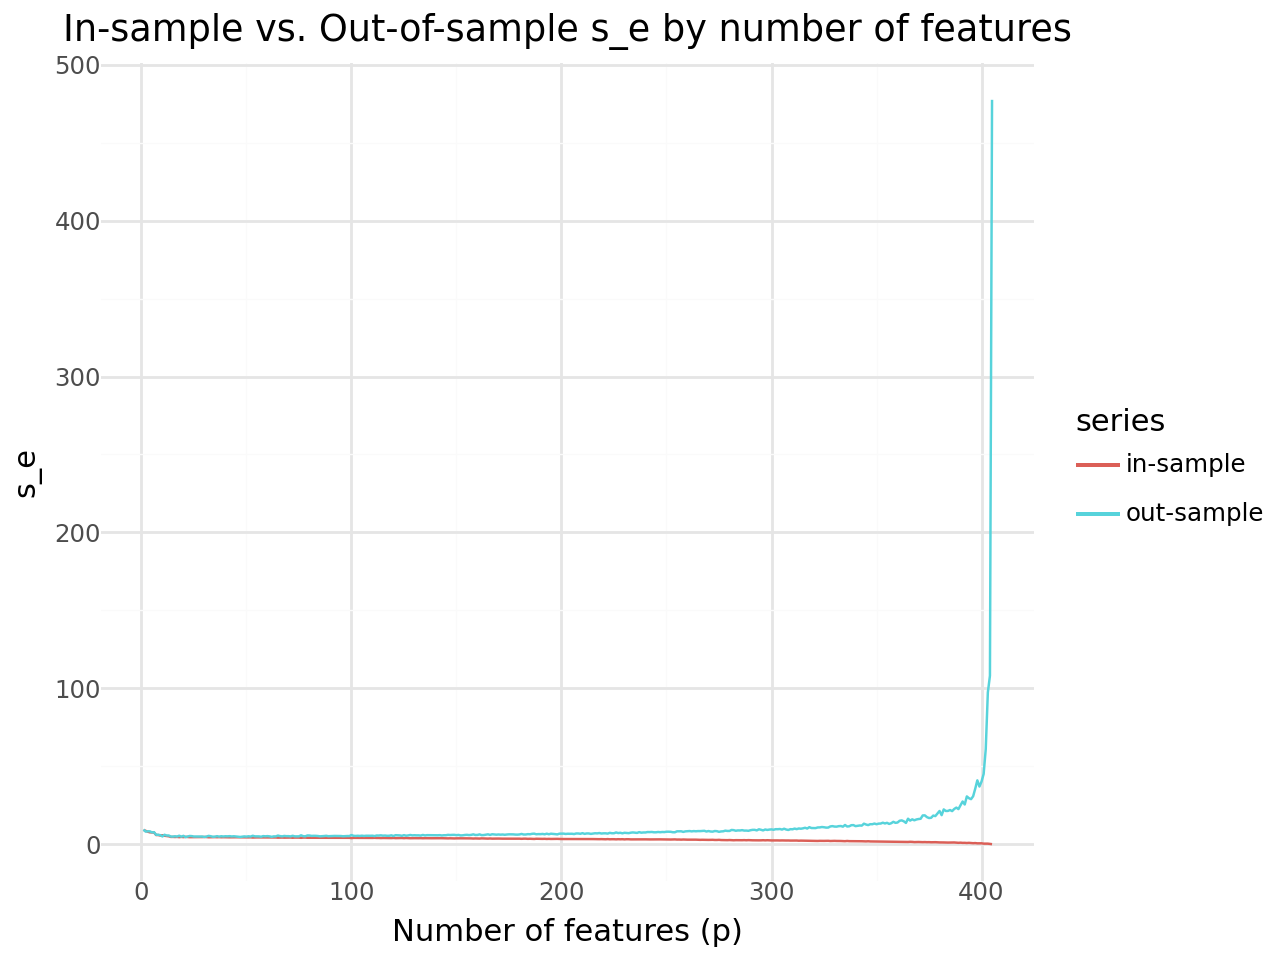

In [48]:
import pandas as pd
from plotnine import ggplot, aes, geom_line, labs, theme_minimal

# Create data frames for the in-sample and out-of-sample standard errors.
df_in = pd.DataFrame({
    's_e': s_e_by_p,
    'p': range(1, n_train + 1),
    'series': 'in-sample'
})
df_out = pd.DataFrame({
    's_e': ooss_e_by_p,
    'p': range(1, n_train + 1),
    'series': 'out-sample'
})

# Combine the two dataframes
df = pd.concat([df_in, df_out], ignore_index=True)

# Create the plot using plotnine
plot = (ggplot(df, aes(x='p', y='s_e', color='series'))
        + geom_line()
        + labs(x='Number of features (p)',
               y='s_e',
               title='In-sample vs. Out-of-sample s_e by number of features')
        + theme_minimal()
       )

plot

Is this shape expected? Explain.

Yes this shape is expected because as we add more features the in-sample error will decrease due to the the model fitting the additional features and data. However, the out of sample error will start to get worse due to the over-fitting that is occurring. This will lead to a worse modle that produces worse predictions for data that is out of sample. 

Now repeat the exercise above except use 5-fold CV (K=5 cross validation) for each p. The code below will also plot the oos RMSE. This oos RMSE curve should be similar to the curve in the above problem, but now it will be more stable. 

In [48]:
from plotnine import ggplot, aes, geom_line, labs, theme_minimal
# Assume n, y, and X_with_junk are already defined.
p_max = X_with_junk.shape[1]  # Total number of features
K = 5  # Number of folds

# Create a folds array: assign each observation to one of K folds, then shuffle
folds = np.repeat(np.arange(K), np.ceil(n / K))[:n]
np.random.shuffle(folds)

# Initialize a matrix to store RMSE values for each model size and fold
ooss_e_by_p_k = np.empty((p_max, K))

for j in range(1, p_max + 1):  # Iterate over number of features
    for k in range(K):  # Iterate over each fold
        test_indices = np.where(folds == k)[0]
        train_indices = np.where(folds != k)[0]
        
        # Subset the data using the first j columns
        X_train = X_with_junk[train_indices, :j]
        y_train = y[train_indices]
        X_test = X_with_junk[test_indices, :j]
        y_test = y[test_indices]
        
        # Fit an OLS model with no intercept
        model = sm.OLS(y_train, X_train).fit()
        y_hat = model.predict(X_test)
        
        # Compute RMSE for this fold and model size
        ooss_e_by_p_k[j-1, k] = np.sqrt(np.mean((y_test - y_hat) ** 2))

# Compute the mean and standard deviation of RMSE over folds
mean_rmse_by_p = np.mean(ooss_e_by_p_k, axis=1)
sd_rmse_by_p = np.std(ooss_e_by_p_k, axis=1)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'p': np.arange(1, p_max + 1), 's_e': sd_rmse_by_p})

# Plot using plotnine
plot = (
    ggplot(df_plot, aes(x='p', y='s_e'))
    + geom_line()
    + labs(x="Number of Features", y="OOS RMSE (sd)", title="5-fold CV OOS RMSE vs. Number of Features")
    + theme_minimal()
)

print(plot)


<ggplot: (640 x 480)>


Even though the concept of confidence intervals (CIs) will not be on the midterm, construct 95% CIs for each of the oosRMSE measurements by number of features, p. A CI is a real-number interval with a lower bound and upper bound. The formula for the CI is [s_e - 2 * s_s_e, s_e + 2 * s_s_e].

In [61]:
# Compute the mean out-of-sample RMSE for each model size (row-wise mean)
mean_oos = np.mean(ooss_e_by_p_k)

# Compute the sample standard deviation for each model size (across simulations)
sd_oos = np.std(ooss_e_by_p_k)

# Construct the 95% confidence intervals
CI_lower = mean_rmse_by_p - 2 * sd_rmse_by_p
CI_upper = mean_rmse_by_p + 2 * sd_rmse_by_p


# Create a DataFrame with the number of features and the CI bounds.
# Assuming n_train is the number of features (columns in X_with_junk)
df_CI = pd.DataFrame({
    'p': np.arange(1, p_max + 1),
    'mean_oos': mean_rmse_by_p,
    'CI_lower': CI_lower,
    'CI_upper': CI_upper
})


print(df_CI)

       p    mean_oos    CI_lower    CI_upper
0      1    9.165063    7.535966   10.794160
1      2    8.486665    6.423347   10.549982
2      3    8.049311    5.885952   10.212670
3      4    7.709715    5.598539    9.820890
4      5    7.557527    5.646146    9.468907
..   ...         ...         ...         ...
400  401   48.437818   24.305020   72.570616
401  402   48.983965   35.001796   62.966134
402  403   53.522323   37.137725   69.906921
403  404  125.902926 -101.333290  353.139142
404  405  118.102199 -133.745075  369.949473

[405 rows x 4 columns]
